In [33]:
import pandas as pd
import pypsa

import matplotlib.pyplot as plt
import country_converter as coco

In [34]:
cc = coco.CountryConverter()
historic = pd.read_csv(
    "../resources/validation-test/historical_cross_border_flows.csv",
    index_col=0,
    header=0,
    parse_dates=True,
)

n = pypsa.Network("../results/validation-test/networks/elec_s_37_ec_lv1.0_Ept.nc")
n.loads.carrier = "load"



INFO:pypsa.io:Imported network elec_s_37_ec_lv1.0_Ept.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units


In [15]:
len(historic.index)

8759

In [16]:
len(n.snapshots)

8760

In [17]:
if len(historic.index) > len(n.snapshots):
    print('yes')
    historic = historic.resample(n.snapshots.inferred_freq).mean().loc[n.snapshots]

In [18]:




all_country = sorted(
    list(
        set(
            [link[:2] for link in historic.columns[1:]]
            + [link[5:] for link in historic.columns[1:]]
        )
    )
)

color_country = {
    "AL": "#440154",
    "AT": "#482677",
    "BA": "#43398e",
    "BE": "#3953a4",
    "BG": "#2c728e",
    "CH": "#228b8d",
    "CZ": "#1f9d8a",
    "DE": "#29af7f",
    "DK": "#3fbc73",
    "EE": "#5ec962",
    "ES": "#84d44b",
    "FI": "#addc30",
    "FR": "#d8e219",
    "GB": "#fde725",
    "GR": "#f0f921",
    "HR": "#f1c25e",
    "HU": "#f4a784",
    "IE": "#f78f98",
    "IT": "#f87ea0",
    "LT": "#f87a9a",
    "LU": "#f57694",
    "LV": "#f3758d",
    "ME": "#f37685",
    "MK": "#f37b7c",
    "NL": "#f28774",
    "NO": "#f1976b",
    "PL": "#efaa63",
    "PT": "#ebb160",
    "RO": "#e6c260",
    "RS": "#e2d75e",
    "SE": "#dedc5b",
    "SI": "#d9e35a",
    "SK": "#d3e75a",
}

In [19]:
optimized_links = n.links_t.p0.rename(
    columns=dict(n.links.bus0.str[:2] + " - " + n.links.bus1.str[:2])
)
optimized_lines = n.lines_t.p0.rename(
    columns=dict(n.lines.bus0.str[:2] + " - " + n.lines.bus1.str[:2])
)
optimized = pd.concat([optimized_links, optimized_lines], axis=1)

# Drop internal country connection
optimized.drop([c for c in optimized.columns if c[:2] == c[5:]], axis=1, inplace=True)

# align columns name
for c1 in optimized.columns:
    for c2 in optimized.columns:
        if c1[:2] == c2[5:] and c2[:2] == c1[5:]:
            optimized = optimized.rename(columns={c1: c2})

optimized = optimized.groupby(lambda x: x, axis=1).sum()

In [39]:
n.links_t.p0

Link                      13589  14801  14802  14803  14804+1       14805  \
snapshot                                                                    
2019-01-01 00:00:00  306.021022    0.0    0.0    0.0      0.0 -599.994919   
2019-01-01 01:00:00  246.940275    0.0    0.0    0.0      0.0 -599.998353   
2019-01-01 02:00:00  165.782955    0.0    0.0    0.0      0.0 -599.998845   
2019-01-01 03:00:00  537.286186    0.0    0.0    0.0      0.0 -599.768030   
2019-01-01 04:00:00  603.293394    0.0    0.0    0.0      0.0 -599.850296   
...                         ...    ...    ...    ...      ...         ...   
2019-12-31 19:00:00    0.000000    0.0    0.0    0.0      0.0    0.000000   
2019-12-31 20:00:00    0.000000    0.0    0.0    0.0      0.0    0.000000   
2019-12-31 21:00:00    0.000000    0.0    0.0    0.0      0.0    0.000000   
2019-12-31 22:00:00    0.000000    0.0    0.0    0.0      0.0    0.000000   
2019-12-31 23:00:00    0.000000    0.0    0.0    0.0      0.0    0.000000   

Link                      14807       14809       14811       14814  ...  \
snapshot                                                             ...   
2019-01-01 00:00:00 -586.349671 -299.995129  499.994357  999.999735  ...   
2019-01-01 01:00:00 -585.720153 -299.998477  499.998597  999.999631  ...   
2019-01-01 02:00:00 -585.396121 -299.998852  499.854378  999.999576  ...   
2019-01-01 03:00:00 -586.586377 -299.791592 -475.867907  999.999827  ...   
2019-01-01 04:00:00 -530.693281 -299.874600  152.401079  999.999817  ...   
...                         ...         ...         ...         ...  ...   
2019-12-31 19:00:00    0.000000    0.000000    0.000000    0.000000  ...   
2019-12-31 20:00:00    0.000000    0.000000    0.000000    0.000000  ...   
2019-12-31 21:00:00    0.000000    0.000000    0.000000    0.000000  ...   
2019-12-31 22:00:00    0.000000    0.000000    0.000000    0.000000  ...   
2019-12-31 23:00:00    0.000000    0.000000    0.000000    0.000000  ...   

Link                      14824        14825        14826  14848        5580  \
snapshot                                                                       
2019-01-01 00:00:00 -599.995142 -1999.793718  1999.999827    0.0  101.525354   
2019-01-01 01:00:00 -599.998304  -670.595964  1999.999827    0.0  101.629627   
2019-01-01 02:00:00 -599.998906 -1240.684746  1999.999760    0.0  100.678589   
2019-01-01 03:00:00 -599.763651 -1999.608847  1999.999840    0.0   97.666894   
2019-01-01 04:00:00 -599.847669 -1998.517008  1999.999799    0.0  104.415540   
...                         ...          ...          ...    ...         ...   
2019-12-31 19:00:00    0.000000     0.000000     0.000000    0.0    0.000000   
2019-12-31 20:00:00    0.000000     0.000000     0.000000    0.0    0.000000   
2019-12-31 21:00:00    0.000000     0.000000     0.000000    0.0    0.000000   
2019-12-31 22:00:00    0.000000     0.000000     0.000000    0.0    0.000000   
2019-12-31 23:00:00    0.000000     0.000000     0.000000    0.0    0.000000   

Link                       5581      5586+4        5601        5640  \
snapshot                                                              
2019-01-01 00:00:00 -368.184732 -299.906447 -599.996152   79.733672   
2019-01-01 01:00:00 -340.695427 -299.920608 -599.998677  103.422705   
2019-01-01 02:00:00 -414.675908 -299.918366 -599.999069  124.523559   
2019-01-01 03:00:00   23.101582 -299.908898 -599.793144   39.524225   
2019-01-01 04:00:00  136.926554 -299.902522 -599.879325   23.117590   
...                         ...         ...         ...         ...   
2019-12-31 19:00:00    0.000000    0.000000    0.000000    0.000000   
2019-12-31 20:00:00    0.000000    0.000000    0.000000    0.000000   
2019-12-31 21:00:00    0.000000    0.000000    0.000000    0.000000   
2019-12-31 22:00:00    0.000000    0.000000    0.000000    0.000000   
2019-12-31 23:00:00    0.000000    0.000000    0.000000    0.000000   

Link                        6342  
snapshot 

<AxesSubplot:xlabel='snapshot'>

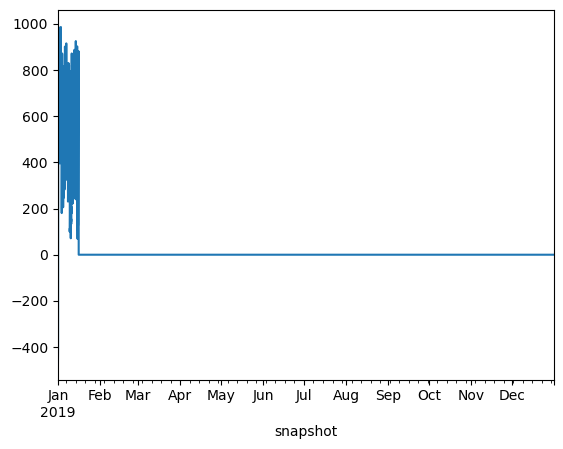

In [37]:
optimized_lines['AL - GR'].plot()

In [32]:
optimized

AL - GR     AL - ME  AL - MK     AL - RS     AT - CH  \
snapshot                                                                       
2019-01-01 00:00:00 -467.945477 -238.111809      0.0  -83.913827 -231.815415   
2019-01-01 01:00:00 -451.771144 -244.093387      0.0  -40.352418  181.697125   
2019-01-01 02:00:00 -404.052764 -268.437166      0.0   -9.478829 -462.761139   
2019-01-01 03:00:00   41.246537 -461.353663      0.0 -226.627012 -930.853197   
2019-01-01 04:00:00   29.284632 -473.920125      0.0 -186.422145 -755.808493   
...                         ...         ...      ...         ...         ...   
2019-12-31 19:00:00    0.000000    0.000000      0.0    0.000000    0.000000   
2019-12-31 20:00:00    0.000000    0.000000      0.0    0.000000    0.000000   
2019-12-31 21:00:00    0.000000    0.000000      0.0    0.000000    0.000000   
2019-12-31 22:00:00    0.000000    0.000000      0.0    0.000000    0.000000   
2019-12-31 23:00:00    0.000000    0.000000      0.0    0.000000    0.000000   

                         AT - CZ      AT - DE      AT - HU     AT - IT  \
snapshot                                                                 
2019-01-01 00:00:00   391.030654 -5721.002469  1678.132690  160.772995   
2019-01-01 01:00:00  -127.521697 -6749.183802  1447.401439  127.988310   
2019-01-01 02:00:00  -518.251814 -7200.281177  1037.655084   29.944450   
2019-01-01 03:00:00  1408.610412 -4158.894467  1252.900396   52.896824   
2019-01-01 04:00:00   909.437332 -3957.827396  1119.510030  103.569299   
...                          ...          ...          ...         ...   
2019-12-31 19:00:00     0.000000     0.000000     0.000000    0.000000   
2019-12-31 20:00:00     0.000000     0.000000     0.000000    0.000000   
2019-12-31 21:00:00     0.000000     0.000000     0.000000    0.000000   
2019-12-31 22:00:00     0.000000     0.000000     0.000000    0.000000   
2019-12-31 23:00:00     0.000000     0.000000     0.000000    0.000000   

                         AT - SI  ...     ME - RS     MK - RS  NL - DK  \
snapshot                          ...                                    
2019-01-01 00:00:00  1281.462546  ...   73.146905  326.779803      0.0   
2019-01-01 01:00:00   888.454222  ...  159.628489  233.170549      0.0   
2019-01-01 02:00:00   206.947774  ...  240.228711   70.812789      0.0   
2019-01-01 03:00:00   383.694400  ...   23.034022 -256.831410      0.0   
2019-01-01 04:00:00   467.267865  ...  109.618432 -272.042536      0.0   
...                          ...  ...         ...         ...      ...   
2019-12-31 19:00:00     0.000000  ...    0.000000    0.000000      0.0   
2019-12-31 20:00:00     0.000000  ...    0.000000    0.000000      0.0   
2019-12-31 21:00:00     0.000000  ...    0.000000    0.000000      0.0   
2019-12-31 22:00:00     0.000000  ...    0.000000    0.000000      0.0   
2019-12-31 23:00:00     0.000000  ...    0.000000    0.000000      0.0   

                        NL - NO      NO - SE      PL - LT     PL - SE  \
snapshot                                                                
2019-01-01 00:00:00  699.999959 -5098.776485  1999.993880  599.994411   
2019-01-01 01:00:00  699.999959 -5098.776484  1999.997651  599.997833   
2019-01-01 02:00:00  699.999958 -5098.776484  1999.998841  599.998886   
2019-01-01 03:00:00  699.999958 -5098.776484  1675.361102 -599.570911   
2019-01-01 04:00:00  699.999962 -5098.776488   567.179336 -599.823190   
...                         ...          ...          ...         ...   
2019-12-31 19:00:00    0.000000     0.000000     0.000000    0.000000   
2019-12-31 20:00:00    0.000000     0.000000     0.000000    0.000000   
2019-12-31 21:00:00    0.000000     0.000000     0.000000    0.000000   
2019-12-31 22:00:00    0.000000     0.000000     0.000000    0.000000   
2019-12-31 23:00:00    0.000000     0.000000     0.000000    0.000000   

                         PL - SK      RO - RS     SE - DE  
snapshot                                       

In [25]:
def sort_one_country(country, df):
    indices = [link for link in df.columns if country in link]
    df_country = df[indices].copy()
    for link in df_country.columns:
        if country in link[5:]:
            df_country[link] = -df_country[link]
            link_reverse = str(link[5:] + " - " + link[:2])
            df_country = df_country.rename(columns={link: link_reverse})

    return df_country.reindex(sorted(df_country.columns), axis=1)


def cross_border_time_series(data):
    
    fig, ax = plt.subplots(2*len(all_country), 1, figsize=(15, 10*len(all_country)))
    axis = 0
    
    for country in all_country:
        ymin = 0
        ymax = 0
        for df in data:
            df_country = sort_one_country(country, df)
            df_neg, df_pos = df_country.clip(upper=0), df_country.clip(lower=0)

            color = [color_country[link[5:]] for link in df_country.columns]

            df_pos.plot.area(
                ax=ax[axis], stacked=True, linewidth=0.0, color=color, ylim=[-1, 1]
            )

            df_neg.plot.area(
                ax=ax[axis], stacked=True, linewidth=0.0, color=color, ylim=[-1, 1]
            )
            if (axis % 2) == 0:
                title = "Historic"
            else:
                title = "Optimized"
            
            ax[axis].set_title(
                title + " Import / Export for " + cc.convert(country, to="name_short")
            )

            # Custom legend elements
            legend_elements = []

            for link in df_country.columns:
                legend_elements = legend_elements + [
                    plt.fill_between(
                        [],
                        [],
                        color=color_country[link[5:]],
                        label=cc.convert(link[5:], to="name_short"),
                    )
                ]

            # Create the legend
            ax[axis].legend(handles=legend_elements, loc="upper right")

            # rescale the y axis
            neg_min = df_neg.sum(axis=1).min() * 1.2
            if neg_min < ymin:
                ymin = neg_min

            pos_max = df_pos.sum(axis=1).max() * 1.2
            if pos_max < ymax:
                ymax = pos_max
                
            print(f'{str(len(df_pos))} in {str(axis)}')

            axis = axis + 1
        
        for x in range(axis-2,axis):
            ax[x].set_ylim([neg_min, pos_max])

    fig.savefig(
        f"trade_time_series/trade_time_series.png", bbox_inches="tight"
    )


def cross_border_bar(data):
    df_positive = pd.DataFrame()
    df_negative = pd.DataFrame()
    color = []

    for country in all_country:
        order = 0
        for df in data:
            
            if (order % 2) == 0:
                title = "Historic"
            else:
                title = "Optimized"
            
            df_country = sort_one_country(country, df)
            df_neg, df_pos = df_country.clip(upper=0), df_country.clip(lower=0)

            color = [color_country[link[5:]] for link in df_country.columns] + color
            df_positive_new = pd.DataFrame(data=df_pos.sum()).T.rename(
                {0: title + " " + cc.convert(country, to="name_short")}
            )
            df_negative_new = pd.DataFrame(data=df_neg.sum()).T.rename(
                {0: title + " " + cc.convert(country, to="name_short")}
            )

            df_positive = pd.concat([df_positive_new, df_positive])
            df_negative = pd.concat([df_negative_new, df_negative])

            order = order + 1
            
    fig, ax = plt.subplots(figsize=(15, 60))
    
    #for i in range(3):
    #    color[i] = '#545454' 
            
    df_positive.plot.barh(ax=ax, stacked=True, color=color, zorder=2)
    df_negative.plot.barh(ax=ax, stacked=True, color=color, zorder=2)
        
    plt.grid(axis="x", zorder=0)
    plt.grid(axis="y", zorder=0)

    # Custom legend elements
    legend_elements = []

    for country in list(color_country.keys()):
        legend_elements = legend_elements + [
            plt.fill_between(
                [],
                [],
                color=color_country[country],
                label=cc.convert(country, to="name_short"),
            )
        ]

    # Create the legend
    plt.legend(handles=legend_elements, loc="upper right")

    fig.savefig("cross_border_bar.png", bbox_inches="tight")

    # Show the plot
    plt.show()

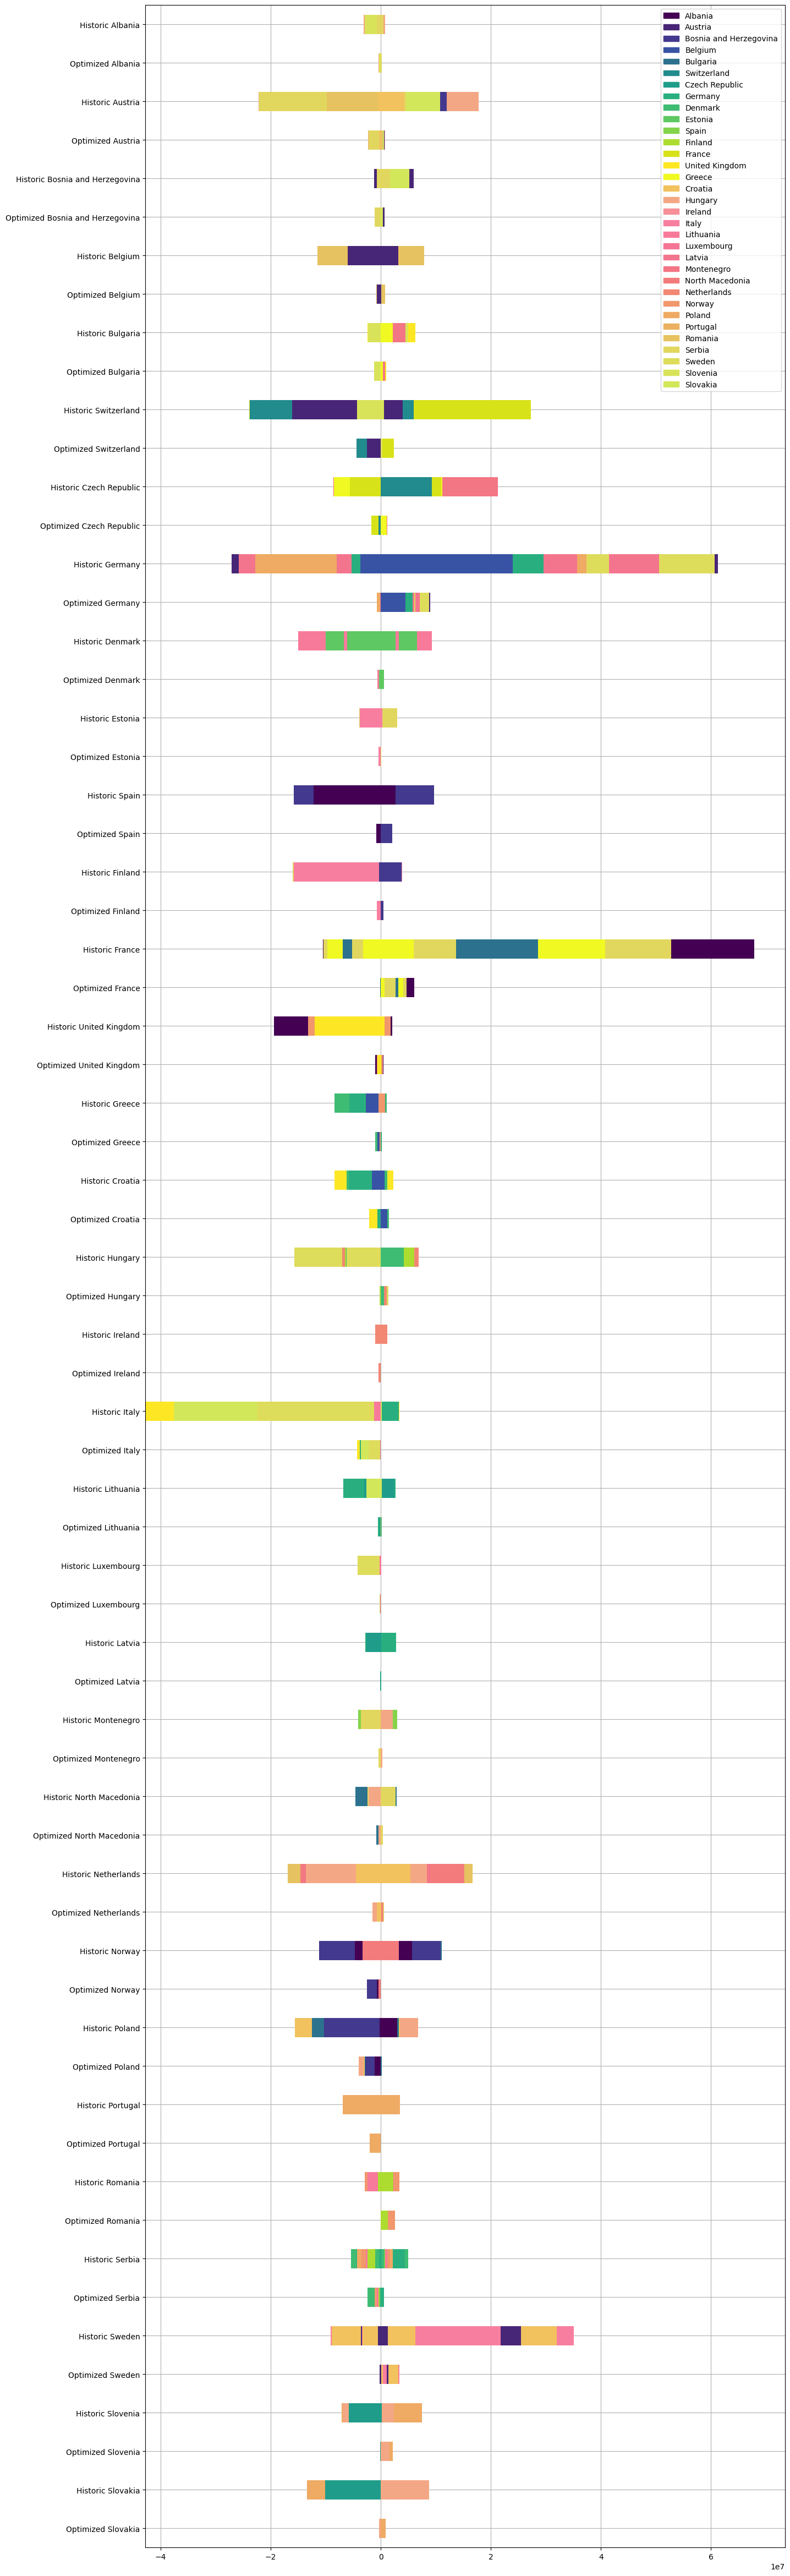

In [21]:
cross_border_bar([historic, optimized])

In [26]:
cross_border_time_series([historic, optimized])

8759 in 0
8760 in 1
8759 in 2
8760 in 3
8759 in 4
8760 in 5
8759 in 6
8760 in 7
8759 in 8
8760 in 9
8759 in 10
8760 in 11
8759 in 12
8760 in 13
8759 in 14
8760 in 15
8759 in 16
8760 in 17
8759 in 18
8760 in 19
8759 in 20
8760 in 21
8759 in 22
8760 in 23
8759 in 24
8760 in 25
8759 in 26
8760 in 27
8759 in 28
8760 in 29
8759 in 30
8760 in 31
8759 in 32
8760 in 33
8759 in 34
8760 in 35
8759 in 36
8760 in 37
8759 in 38
8760 in 39
8759 in 40
8760 in 41
8759 in 42
8760 in 43
8759 in 44
8760 in 45
8759 in 46
8760 in 47
8759 in 48
8760 in 49
8759 in 50
8760 in 51
8759 in 52
8760 in 53
8759 in 54
8760 in 55
8759 in 56
8760 in 57
8759 in 58
8760 in 59
8759 in 60
8760 in 61
8759 in 62
8760 in 63
8759 in 64
8760 in 65
